In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df= pd.read_csv("resources/titanic_train.csv", parse_dates=True)

In [13]:
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

# Deleting columns we don't need
- passangerid
- name
- ticket

In [14]:
df.drop(["PassengerId", "Name", "Ticket"], axis=1, inplace=True)

## Missing data
- too many values missint for cabin so lets drop

In [16]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [17]:
df.drop("Cabin", axis=1, inplace=True)

## Replacing missing age
- lets try to replace the age with the average per class

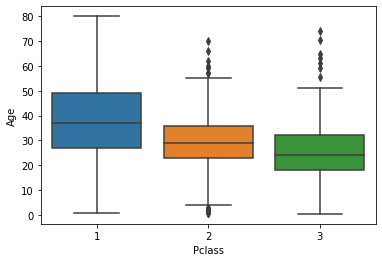

In [26]:
sns.boxplot(x = df["Pclass"], y= df["Age"])

In [48]:
def replaceAge(cols):
    age = cols[0]
    pclass = cols[1]
    if pd.isnull(age):
        if pclass == 1:
            return 38
        elif pclass == 2:
            return 30
        else:
            return 27
    else:
        return age

### Applying age replace func

In [49]:
df['Age'] = df[["Age","Pclass"]].apply(replaceAge, axis=1)

In [51]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

# Dropping Embarked
- Will remove the two missing rows 

In [56]:
df = df.dropna()

In [58]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Converting String Values

In [63]:
df["Sex"] = pd.get_dummies(df["Sex"], drop_first=True)

/Users/admin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [65]:
df["Embarked"].nunique()

3

In [69]:
embarked = pd.get_dummies(df["Embarked"], drop_first=True)

In [70]:
df = pd.concat([df, embarked], axis=1)

In [72]:
df.drop("Embarked", axis=1, inplace=True)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Sex         889 non-null uint8
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
Q           889 non-null uint8
S           889 non-null uint8
dtypes: float64(2), int64(4), uint8(3)
memory usage: 51.2 KB


## Setting data for up model 
- Survived will be our target 

In [78]:
X = df.drop("Survived", axis=1)
y = df["Survived"]

## Training testing and splitting

In [79]:
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [85]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 622 entries, 486 to 103
Data columns (total 8 columns):
Pclass    622 non-null int64
Sex       622 non-null uint8
Age       622 non-null float64
SibSp     622 non-null int64
Parch     622 non-null int64
Fare      622 non-null float64
Q         622 non-null uint8
S         622 non-null uint8
dtypes: float64(2), int64(3), uint8(3)
memory usage: 31.0 KB


In [86]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 281 to 430
Data columns (total 8 columns):
Pclass    267 non-null int64
Sex       267 non-null uint8
Age       267 non-null float64
SibSp     267 non-null int64
Parch     267 non-null int64
Fare      267 non-null float64
Q         267 non-null uint8
S         267 non-null uint8
dtypes: float64(2), int64(3), uint8(3)
memory usage: 13.3 KB


## Creating model

In [87]:
from sklearn.linear_model import LogisticRegression

In [88]:
log = LogisticRegression(max_iter=200)

In [91]:
model  = log.fit(X_train, y_train)

/Users/admin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [92]:
model.intercept_

array([3.87905437])

## Predicitons

In [93]:
predicitons = model.predict(X_test)

In [94]:
predicitons

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

## Metrics

In [95]:
from sklearn.metrics import classification_report, confusion_matrix, explained_variance_score

In [96]:
print(confusion_matrix(predicitons, y_test))

[[144  31]
 [ 23  69]]


In [97]:
print(classification_report(predicitons, y_test))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       175
           1       0.69      0.75      0.72        92

    accuracy                           0.80       267
   macro avg       0.78      0.79      0.78       267
weighted avg       0.80      0.80      0.80       267



In [98]:
print(explained_variance_score(predicitons, y_test))

0.10844720496894411


### Testing on random passangers 

In [111]:
from random import randint
random_index = randint(0, len(X_test))
random_passanger = X_test.iloc[random_index]

In [112]:
random_passanger

Pclass     2.0
Sex        1.0
Age       25.0
SibSp      0.0
Parch      0.0
Fare      13.0
Q          0.0
S          1.0
Name: 134, dtype: float64

## Random Passanger Prediction

In [113]:
X_test.values.shape

(267, 8)

In [114]:
random_passanger.values.shape

(8,)

In [115]:
random_passanger = random_passanger.values.reshape(1,8)

In [116]:
random_passanger

array([[ 2.,  1., 25.,  0.,  0., 13.,  0.,  1.]])

#### Random Prediction Result

In [117]:
model.predict(random_passanger)

array([0])

## True Value

In [118]:
y_test.iloc[random_index]

0